# Проект: Анализ популярности компьютерных игр.

## Описание проекта.

Цель проекта: Выявить закономерности, определяющие успешность игры на рынке для определения потенциально популярного продукта и планирования рекламных кампаний на 2017 г.

Задачи проекта:
1. Определить актуальный период истории продаж для анализа.
2. Отобрать потенциально прибыльные платформы.
3. Определить влияние отзывов пользователей и критиков на продажи игровых платформ.
4. Выделить наиболее и наименее прибыльные жанры игр.
5. Составить портрет пользователя каждого региона.

Источники данных: Сведённые в таблицу данные из открытых источников.
Характер данных: исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
Данные охватывают период с 1980 до 2016 года.

Структура проекта:

1. [Изучение данных.](#start)
2. [Предобработка данных.](#data_preparation)
3. [Исследовательский анализ данных.](#analysis)
4. [Составление портрета пользователей.](#user_profile)
5. [Проверка гипотез](#hypothesis_testing)
6. [Общий вывод.](#outcome)

## Изучение данных.
<a id="start"></a>

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie

In [2]:
data = pd.read_csv('C:/datasets/games.csv')
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Явных дубликатов среди строк датасета нет.
При проверке таблицы на неявные дубликаты проверяем столбцы name, platform и genre, на случай, если что-то написанно, например, разным регистром.

## Предобработка данных.
<a id="data_preparation"></a>

In [4]:
#Приводим названия столбцов таблице к нижнему регистру.
data.columns = data.columns.str.lower()
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Проверка на пропуски

In [5]:
#Выясняем количество пропусков:
display(data['year_of_release'].isna().sum())
display(data['name'].isna().sum())
display(data['genre'].isna().sum())
display(data['critic_score'].isna().sum())
display(data['user_score'].isna().sum())
display(data['rating'].isna().sum())

269

2

2

8578

6701

6766

Столбцы name и genre содержат по 2 пропуска. Их можно удалить. Столбец year_of_release содержит 269 значений NaN. Они составляют 1.61% данных в столбце. Их тоже можно удалить.
Столбцы critic_score, user_score, rating содержат очень большое количество пропусков - 51.32%, 54.59% и 40.48% соответственно. Этого слишком много для того, чтобы выбросить данные из таблицы. Оставить NaN нельзя, поскольку в таком случае мы получим искажённые данные. В столбцах critic_score, user_score пустые ячейки заменим медианными значениями. Пустых значений в столбце rating слишком много для удаления. Заменим значения NaN в этом столбце на "неизвестно".
В столбце rating присутствует дублирование: рейтинг К-А вошёл в состав ретинга Е. Их нужно объединить.

### Проверка на дубликаты.

In [6]:
#Проверяем данные на наличие явных дубликатов.
display(data.duplicated().sum())
#Проверяем таблицу на неявные дубликаты

0

In [7]:
#Проверяю данные на скрытые дубликаты уникальные значения в столбцах:
#Считаю количество названий игр
display(data['name'].value_counts())
display(data['name'].value_counts().count())
#Здесь проверяю, будет ли отличаться количество уникальных значений в столбце name после приведения в нижний регистр.
lower_case_name = data['name'].str.lower()
#Проверяю уникальные значения в остальных столбцах
display(lower_case_name.value_counts().count())
#Страхуюсь на случай пробелов в начале и в конце названий игр:
data['name'] = lower_case_name.str.strip()
display(data['name'].value_counts().count())

display(data['platform'].unique())
display(data['genre'].unique())

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

11559

11559

11559

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [8]:
display(data['year_of_release'].unique())
display(data['critic_score'].unique())
display(data['user_score'].unique())
display(data['rating'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [9]:
#Находим медианное значение для столбцов с большим количеством пропусков и заменяем пустые значения медианными (для critic_score и user_score).
# или "неизвестно" (для rating)

#Заменяю строковое значение tbd (to be done) на NaN
data['user_score'] = data['user_score'].replace('tbd', 'NaN')
#Меняем тип данных в user_score на float.
data['user_score'] = data['user_score'].astype('float')

#Вместо отсутствующих значений в столбцах с оценками ставим заглушку -1
data.loc[data['critic_score'].isna(), 'critic_score'] = -1
data.loc[data['user_score'].isna(), 'user_score'] = -1
#проверяем количество пропусков после удаления
display(data.isna().sum())


rating_value = "неизвестно"
data['rating'].fillna(rating_value, inplace = True)
#Объединяю рейтинги К-А и Е
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].unique()
display(data.head())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,неизвестно
2,mario kart wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,неизвестно


In [10]:
# #Удаляю строки с неполными данными в столбцах name и genre и year_of_release:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
display(data['year_of_release'].isna().sum())
data['year_of_release'].unique()

0

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

In [11]:
#В столбце year_of_release
#data['year_of_release'] = data['year_of_release'].replace(np.nan, 0)
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()
display(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,неизвестно
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,неизвестно


In [12]:
#Создаём столбец с сумарным значением продаж во всех регионах:
data['sales_by_regions'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
display(data.head(60))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_by_regions
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,неизвестно,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,неизвестно,31.38
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,неизвестно,30.26
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,неизвестно,28.31


In [13]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16444 non-null  object 
 1   platform          16444 non-null  object 
 2   year_of_release   16444 non-null  int32  
 3   genre             16444 non-null  object 
 4   na_sales          16444 non-null  float64
 5   eu_sales          16444 non-null  float64
 6   jp_sales          16444 non-null  float64
 7   other_sales       16444 non-null  float64
 8   critic_score      16444 non-null  float64
 9   user_score        16444 non-null  float64
 10  rating            16444 non-null  object 
 11  sales_by_regions  16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name ["'98 koshien" '.hack//g.u. vol.1//rebirth' '.hack//g.u. vol.2//reminisce'
 ... 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!

## Исследовательский анализ данных.
<a id="analysis"></a>

### Определение количества игр по годам.

In [14]:
games_per_year = data.groupby('year_of_release')['name'].count().reset_index()
games_per_year.rename(columns = {'name': 'number_of_games'}, inplace = True)
display(games_per_year)

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


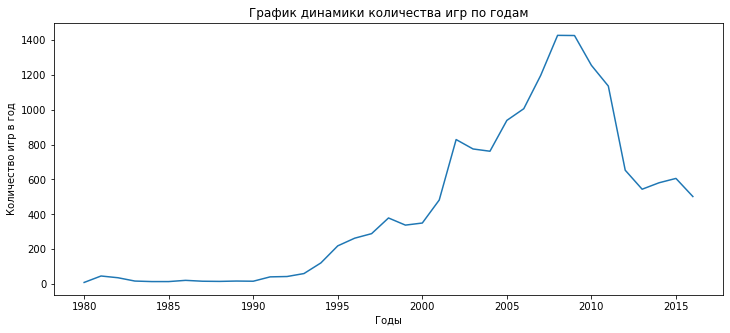

In [15]:
#Построим график динамики количества игр по годам:
fig = plt.figure(figsize = (12, 5))

plt.plot(games_per_year['year_of_release'], games_per_year['number_of_games'])
plt.xlabel('Годы')
plt.ylabel('Количество игр в год')
plt.title('График динамики количества игр по годам')

plt.show()

В начале 1990-х - 2000-х в сфере компьютерных игр пароисходят бурные изменения. Уходят аркадные игры. появляются шутеры от первого лица, стратегии в реальном времени, многопользовательские игры и пр. Кроме того, появляется 3D графика (1993 г.), что должно было сказаться на интересе потребителей к играм. С этого же времени начинается бурный рост количества новых игр в год. На этот же период приходится резкий скачок качества и удешевления компьютерных игр. Происходит замена игровых приставок персональными компьютерами. С этого момента они становятся массовым явлением. Самой ранней отправной точкой для анализа положения дел на нынешнем рынке компьютерных игр можно с известной долей условности считать 1993 год.

### Исследование изменений продаж по платформам. 

In [16]:
#Определяем Топ-10 платформ-лидеров продаж
sales_by_platforms = data.groupby('platform')['sales_by_regions'].sum().reset_index()
sales_by_platforms.rename(columns = {'sales_by_regions': 'total_sales'}, inplace = True)

display(sales_by_platforms.sort_values(by = 'total_sales', ascending = False).head(10))

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Платформы-лидеры продаж: PlayStation 2, Xbox 360, PlayStation 3, Wii, DS (две последние  принадлежат Nintendo).

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


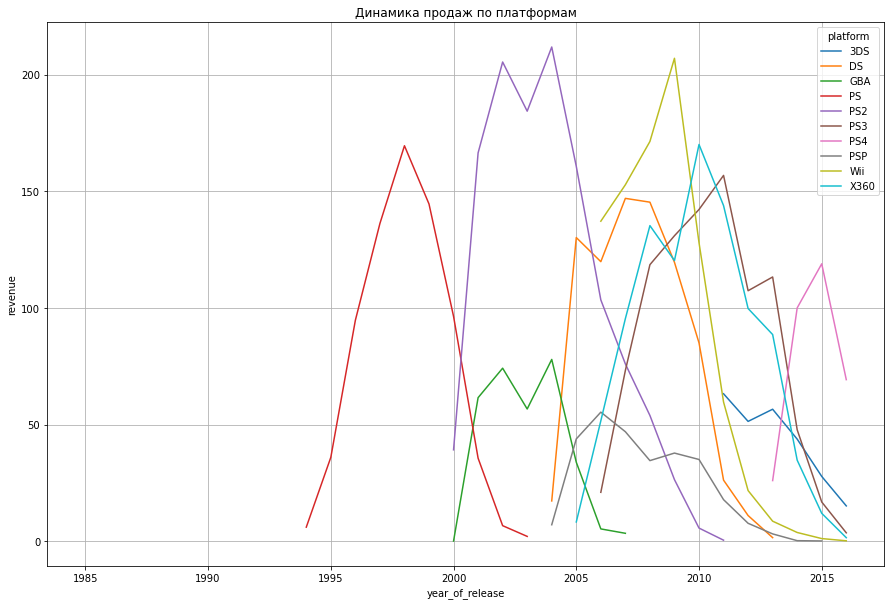

In [17]:
#Строим сводную таблицу и график для определения срока жизни платформы и периода появления новых платформ на рынке по данным с 1993 г.:

#Создаем для графика список Топ-10 лидеров продаж.
platform_list = list(temp.groupby('platform')['sales_by_regions'].sum().sort_values(ascending=False)[:10].index)
display(platform_list)
#Делаем срез по списку платформ
platform_sales = data.query('platform == @platform_list')
#Создаём сводную таблицу с общей доходностью платформ по годам
platform_sales_top_10 = platform_pivot = platform_sales.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_by_regions', aggfunc = 'sum')
display(platform_sales_top_10)
#Строи график.
report = platform_sales_top_10
report.plot(grid=True, figsize=(15, 10))
plt.ylabel('revenue')
plt.xlabel('year_of_release')
plt.title('Динамика продаж по платформам')
plt.show()

In [18]:
# Комментарий ревьюера
temp = data.copy() 
list(temp.groupby('platform')['sales_by_regions'].sum().sort_values(ascending=False)[:10].index)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

### Определение срока жизни платформ и актуального периода для дальнейшего анализа.

In [19]:
time_life = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # срок жизни платформы, должны входить границы диапазона, поэтому +1
time_life['life'].median()
display(time_life)

,platform,min,max,life
,,year_of_release,year_of_release,
0,2600,1980,1989,10
1,3DO,1994,1995,2
2,3DS,2011,2016,6
3,DC,1998,2008,11
4,DS,1985,2013,29
5,GB,1988,2001,14
6,GBA,2000,2007,8
7,GC,2001,2007,7
8,GEN,1990,1994,5


Срок между появлениями более ранних и более поздних платформ около 3-5 лет. Медианный срок "жизни" одной платформы составляет 7 лет. Самые "молодые" платформы среди лидеров продаж - PS4 и 3DS, "прожили" значительно меньше медианного срока (4 и 6 лет, соответственно).
С 2015 г. тенденции не меняются (нет роста продаж, нет скачков). Таким образом, актуальным периодом для анализа становятся 2015-2016 гг.

In [20]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # срок жизни платформы, должны входить границы диапазона, поэтому +1
time_life['life'].median()

7.0

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_by_regions
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,неизвестно,14.63
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,неизвестно,11.68
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,неизвестно,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
16707,aiyoku no eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,неизвестно,0.01


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2014,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


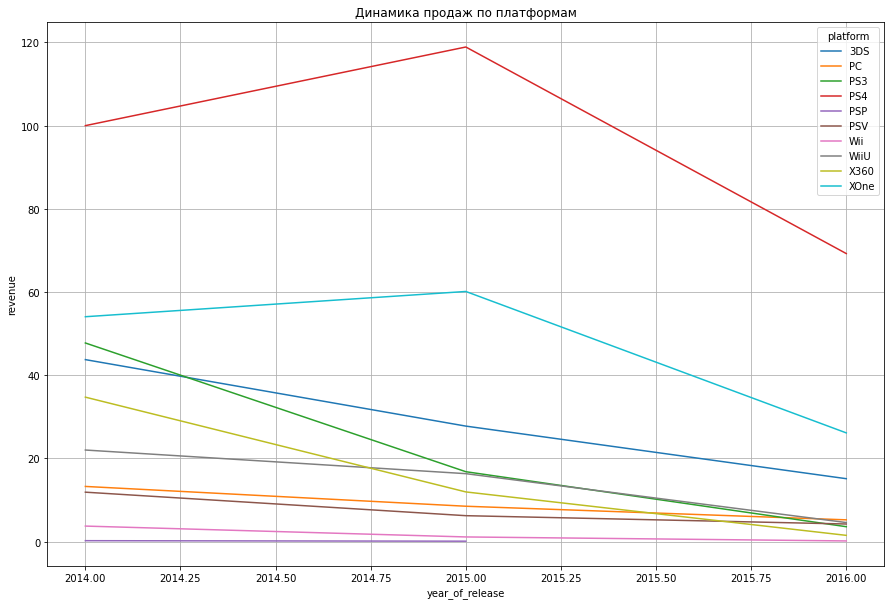

In [21]:
#Определяем лидеров продаж, игровые платформы которых продавались в 2014-2016 гг.
data_2014_2016 = data.query('year_of_release >= 2014')
display(data_2014_2016)
data_2014_2016_pivot = data_2014_2016.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sales_by_regions', aggfunc = 'sum')
display(data_2014_2016_pivot)

report = data_2014_2016_pivot
report.plot(grid=True, figsize=(15, 10))
plt.ylabel('revenue')
plt.xlabel('year_of_release')
plt.title('Динамика продаж по платформам')
plt.show()

Все платформы переживают заметное падение продаж. Все остальные платформы так же переживают падение продаж. Для дальнейшего анализа оставляем три платформы, приносившие в актуальный период наибольший доход: PlayStation4(PS4), X-Box One(XOne) и Nintendo-3DS(3DS). Они точно принесут доход в течение 2017 г.

### Строим "ящик с усами" по глобальным продажам игр в разбивке по платформам

In [22]:
#Выявляем статистику продаж игр на всех платформах, для сравнения с тремя лидерами:
data_2014_2016.groupby('platform')['sales_by_regions'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


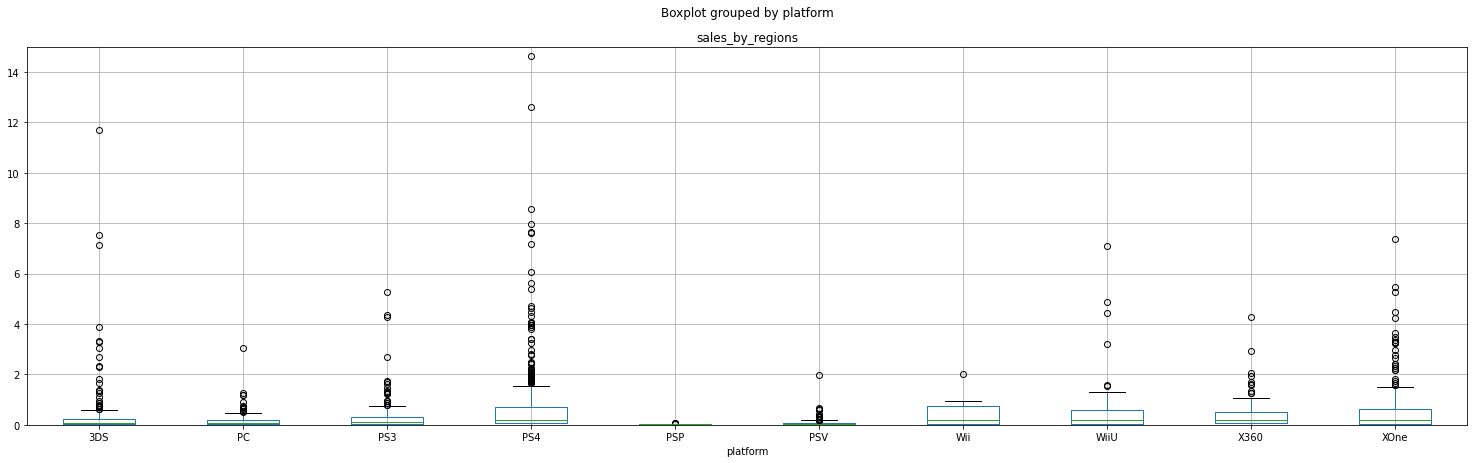

In [23]:
#Строим разбивку продаж по платформам трижды, с разной степенью детализации
data_2014_2016.boxplot(column='sales_by_regions', by='platform', grid=True, figsize=(25,7))
plt.ylim(0, 15)
plt.show()

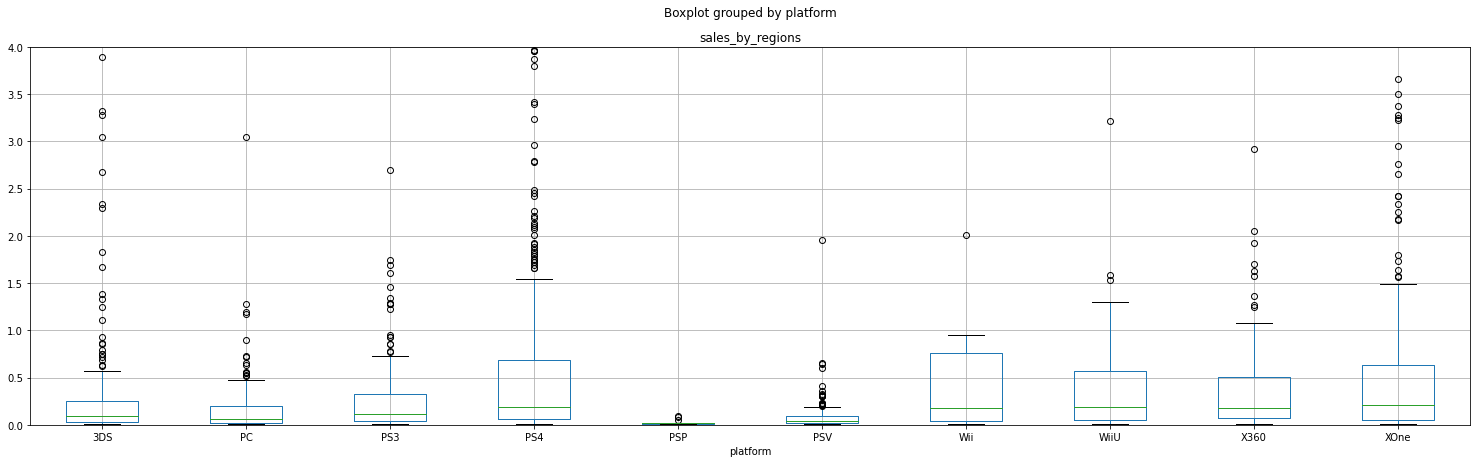

In [24]:
data_2014_2016.boxplot(column='sales_by_regions', by='platform', grid=True, figsize=(25,7))
plt.ylim(0, 4)
plt.show()

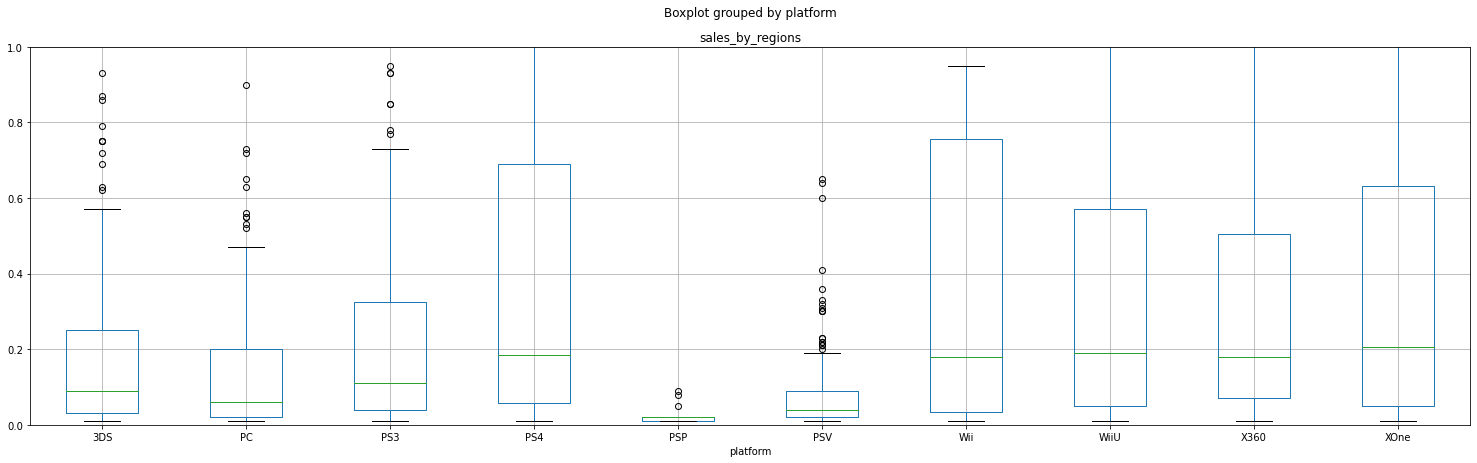

In [25]:
data_2014_2016.boxplot(column='sales_by_regions', by='platform', grid=True, figsize=(25,7))
plt.ylim(0, 1)
plt.show()

Если сравнивать продажи по всем платформам, можно увидеть, что лидеры последних неполных трёх лет не сильно отличаются от других платформ. Медианные продажи многих платформ "плавают" около отметки в 200000. Продажи основной массы игр (3-я квартиль) для PLayStation4(PS4) и XBox-One близки к  максимальным. Что касается Nintendo 3DS, которая на графике выше выглядела как часть тройки лидеров, - она проигрывает по медианному значению продаж и по объёму продаж основной массы игр таким платформам, как Nintendo Wii, Nintendo WiiU и XBox-360. Nintendo 3DS выигрывала здесь за счёт выброса.
Таким образом, компания по продаже игр имеет возможность выбора: сделать третьей предпочтительной платформой Nintendo WiiU или Nintendo Wii. Поскольку на графике продаж за три года и в сводной таблице продаж за три года вклад Nintendo Wii почти равен нулю, третьей рекомендованной платформой для продаж может стать Nintendo WiiU

### Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы и сравнение с другими платформами.

#### Диаграммы рассеяния корреляция для платформы PS4

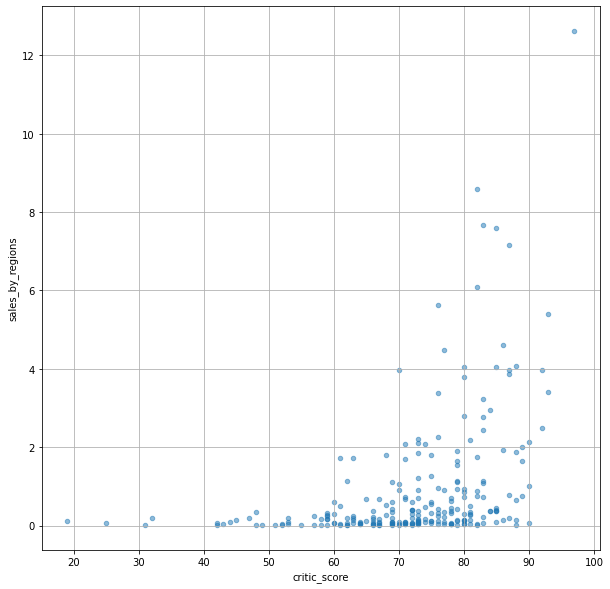

In [26]:
#Строим диаграммы рассеяния, для определения влияния отзывов на продажи
#Отзывы критиков
data_critic_filter = data_2014_2016[data_2014_2016['critic_score'] != -1]
data_critic_filter[data_critic_filter['platform']=='PS4'].plot(x = 'critic_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()
#display(data_critic_filter)

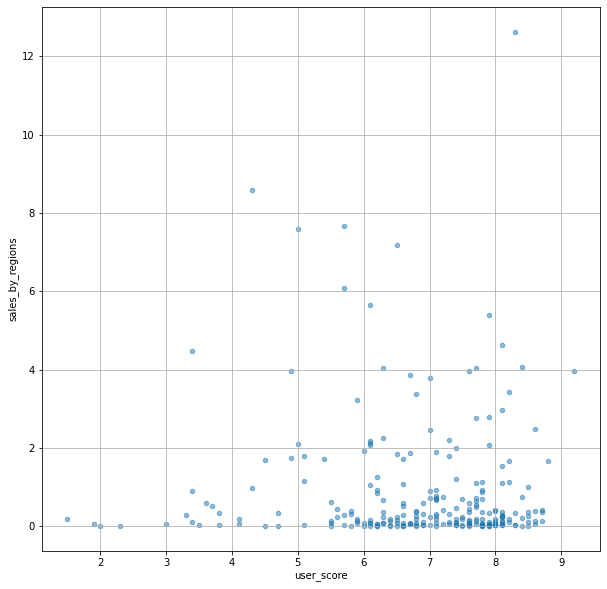

In [27]:
#Отзывы пользователей
data_user_filter = data_2014_2016[data_2014_2016['user_score'] != -1]
data_user_filter[data_user_filter['platform']=='PS4'].plot(x = 'user_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

In [28]:
#Определяем корреляцию между продажами и отзывами критиков
ps_4 = data_critic_filter[data_critic_filter['platform']=='PS4']
#display(ps_4.head())
ps_4_corr = ps_4['critic_score'].corr(ps_4['sales_by_regions'])
display(ps_4_corr)

0.40266141068104083

In [29]:
#Определяем корреляцию между продажами и отзывами пользователей
ps_4_corr = ps_4['user_score'].corr(ps_4['sales_by_regions'])
display(ps_4_corr)

-0.005040571535870913

Графики рассеяния и рассчёты корреляции между отзывами и продажами показывают слабую положительную связь объёма продаж как с отзывами критиков  и ещё более слабую отрицательную - с отзывами пользователей. Возможно, здесь играют роль другие факторы.
Для сравнения было бы хорошо изучить ситуацию с влиянием отзывов на продажи для XBox-One(XOne) Nintendo 3DS(3DS) Nintendo WiiU(WiiU) Nintendo Wii(Wii) XBox-360(X360). Первые две платформы - потому что они попали в тройку лидеров продаж за последние два года. Остальные, поскольку у них медиана продаж больше, чем у лидеров. У Nintendo WiiU(WiiU), тому же, третья квартиль и основная масса покупок без выброса - выше чем у всех остальных платформ, кроме XBox-One(XOne).
В итоге Nintendo Wii(Wii) и  XBox-360(X360) из исследования убираем, поскольку отзывы на них старше 2015 г. и они не попадают в этом вопросе в актуальный период (Код я не стал сохранять, чтобы не загромождать проект. Тем более, что такая проверка не является частью задания). Стоит отметить, что отсутствие отзывов за последние два года может означать падение интереса к платформам. Заменим их на PlayStation Vita(PSV) и PC, как наиболее продаваемые из оставшихся.

#### Диаграммы рассеяния. Корреляция для платформ Nintendo WiiU, XBox-One, Nintendo 3DS, PlayStation Vita и PC.

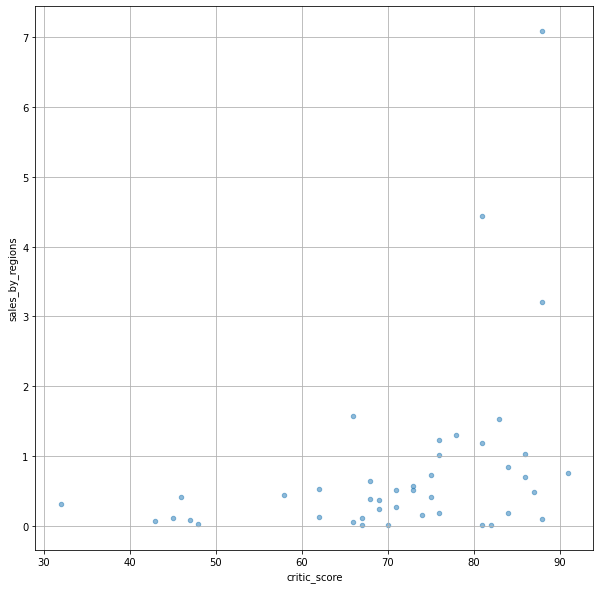

In [30]:
#Строим диаграммы рассеяния, для определения влияния отзывов на продажи платформы WiiU
#Отзывы критиков
data_critic_filter = data_2014_2016[data_2014_2016['critic_score'] != -1]
data_critic_filter[data_critic_filter['platform']=='WiiU'].plot(x = 'critic_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

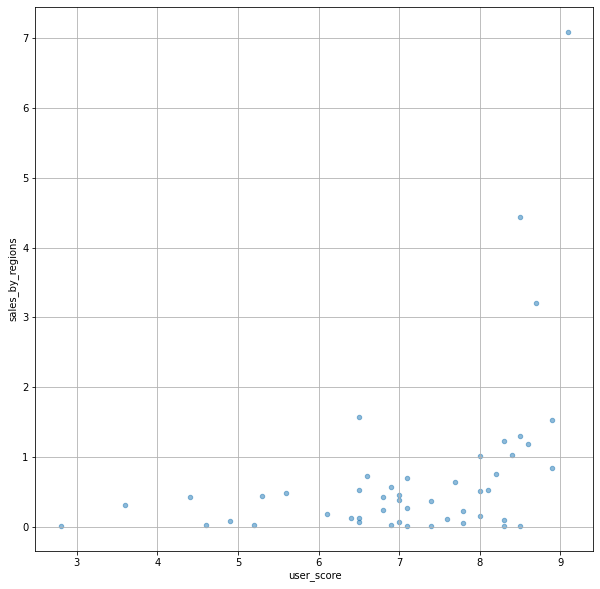

In [31]:
data_user_filter = data_2014_2016[data_2014_2016['user_score'] != -1]
data_user_filter[data_user_filter['platform']=='WiiU'].plot(x = 'user_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

In [32]:
wiiu = data_critic_filter[data_critic_filter['platform'] == 'WiiU']
wiiu_corr = wiiu['critic_score'].corr(wiiu['sales_by_regions'])
display(wiiu_corr)

0.370201412480884

In [33]:
wiiu_corr = wiiu['user_score'].corr(wiiu['sales_by_regions'])
display(wiiu_corr)

0.34650122311934023

Для данной платформы характерна слабая положительная корреляция объёмов продаж и отзывов, как от критиков, так и пользовательских. В случае с этой платформой корреляция с отзывами критиков и корреляция с отзывами пользователей почти не отличается.

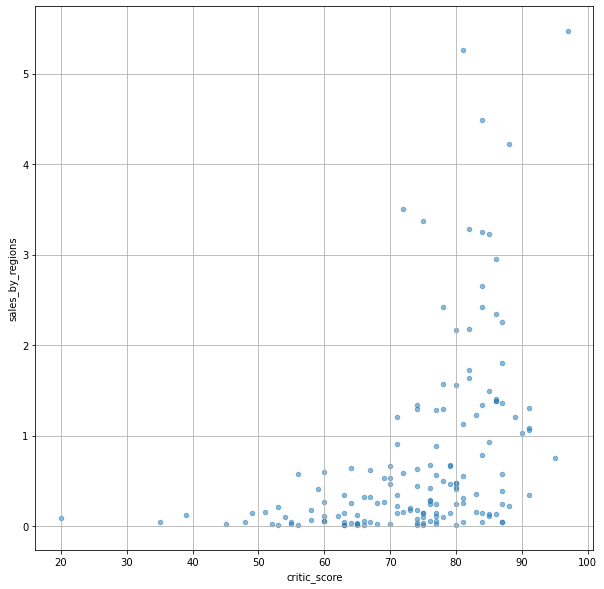

In [34]:
data_critic_filter[data_critic_filter['platform']=='XOne'].plot(x = 'critic_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

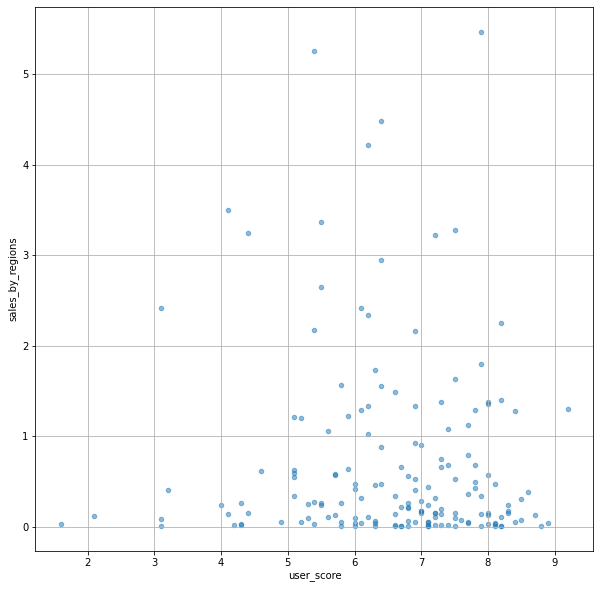

In [35]:
data_user_filter[data_user_filter['platform']=='XOne'].plot(x = 'user_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

In [36]:
x_one = data_critic_filter[data_critic_filter['platform'] == 'XOne']
x_one_corr = x_one['critic_score'].corr(x_one['sales_by_regions'])
display(x_one_corr)

0.42867694370333226

In [37]:
x_one_corr = x_one['user_score'].corr(x_one['sales_by_regions'])
display(x_one_corr)

0.007395767292791306

Для данной платформы так же характерна слабая положительная корреляция объёмов продаж и отзывов, как от критиков, так и пользовательских. Хотя корреляция между объёмом продаж и отзывами критиков намного более существенна.

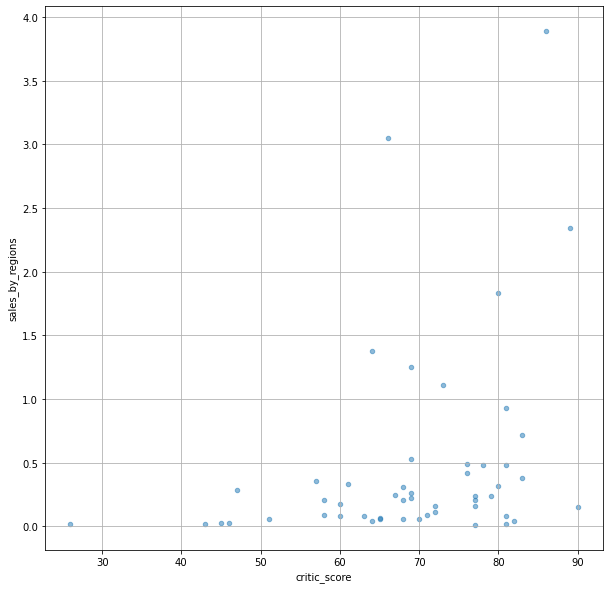

In [38]:
data_critic_filter[data_critic_filter['platform']=='3DS'].plot(x = 'critic_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

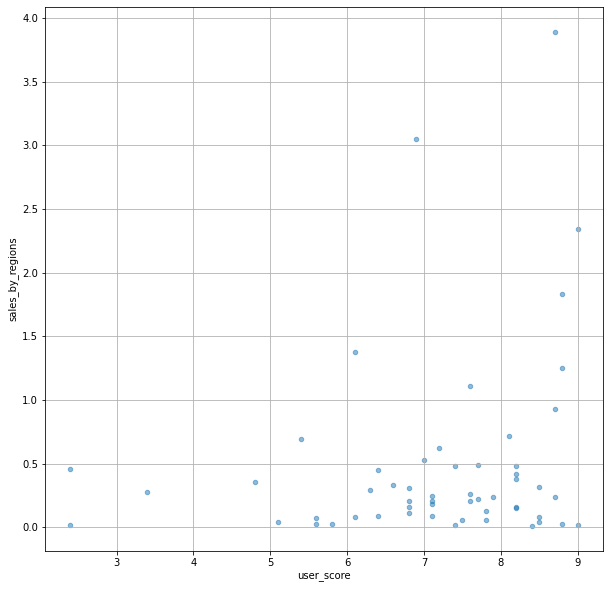

In [39]:
data_user_filter[data_user_filter['platform']=='3DS'].plot(x = 'user_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

In [40]:
ds = data_critic_filter[data_critic_filter['platform'] == '3DS']
ds_corr = ds['critic_score'].corr(ds['sales_by_regions'])
display(ds_corr)

0.314117492869051

In [41]:
ds_corr = ds['user_score'].corr(ds['sales_by_regions'])
display(ds_corr)

0.2743689534161519

Для данной платформы так же, как и для предыдущих, характерна слабая положительная корреляция объёмов продаж и отзывов, как от критиков, так и пользовательских.

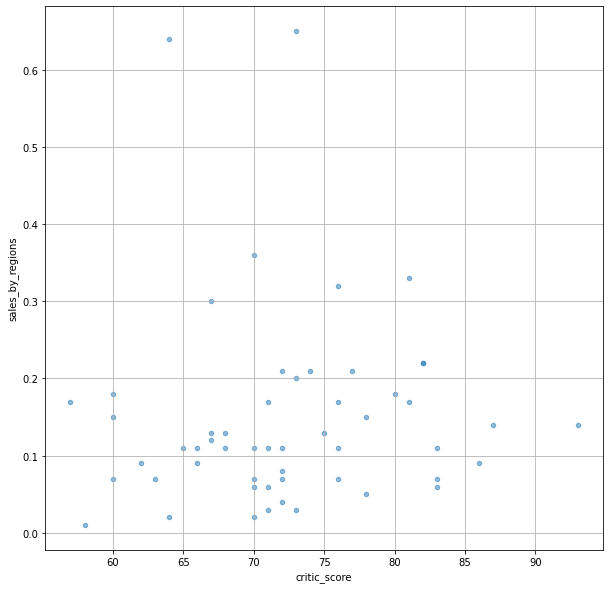

In [42]:
data_critic_filter[data_critic_filter['platform']=='PSV'].plot(x = 'critic_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

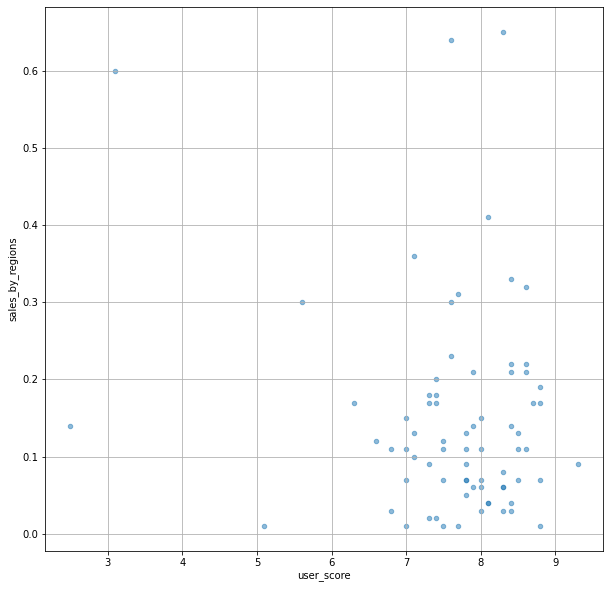

In [43]:
data_user_filter[data_user_filter['platform']=='PSV'].plot(x = 'user_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

In [44]:
psv = data_critic_filter[data_critic_filter['platform'] == 'PSV']
psv_corr = psv['critic_score'].corr(psv['sales_by_regions'])
display(psv_corr)

0.04266490657009526

In [45]:
psv_corr = psv['user_score'].corr(psv['sales_by_regions'])
display(psv_corr)

0.04858251256520456

Для данной платформы характерна слабая положительная корреляция объёмов продаж с отзывовами критиков, и слабая отрицательная - отзывами пользователей.

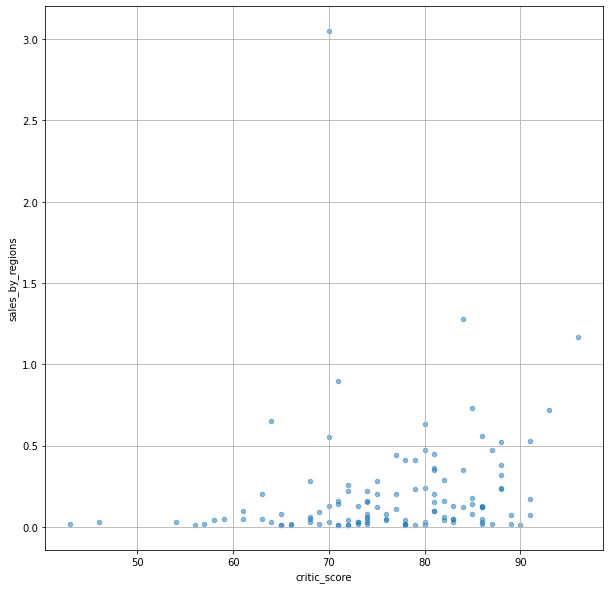

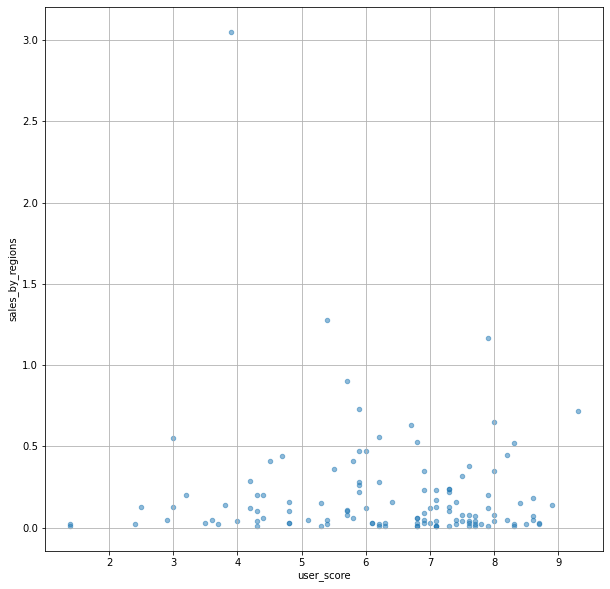

In [46]:
data_critic_filter[data_critic_filter['platform']=='PC'].plot(x = 'critic_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
data_user_filter[data_user_filter['platform']=='PC'].plot(x = 'user_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)



plt.show()

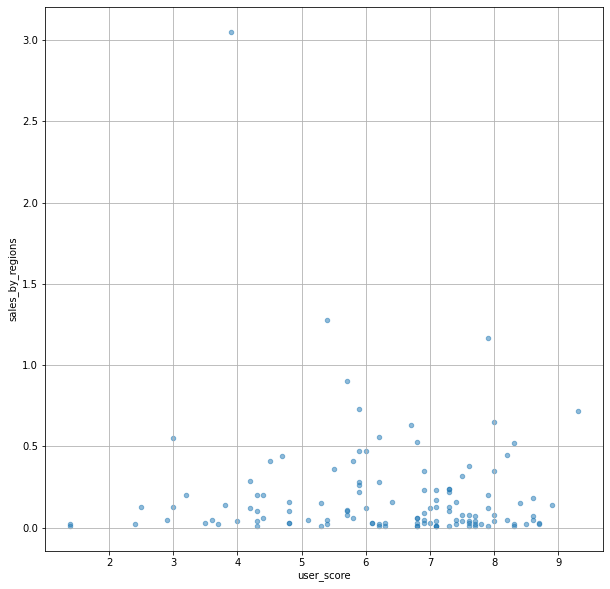

In [47]:
data_user_filter[data_user_filter['platform']=='PC'].plot(x = 'user_score', y = 'sales_by_regions', alpha = 0.5, kind = 'scatter', figsize = (10, 10), grid=True)
plt.show()

In [48]:
pc = data_critic_filter[data_critic_filter['platform'] == 'PC']
pc_corr = pc['critic_score'].corr(pc['sales_by_regions'])
display(pc_corr)

0.17463413769350036

In [49]:
pc_corr = pc['user_score'].corr(pc['sales_by_regions'])
display(pc_corr)

-0.06735643420635776

Для данной платформы так же характерна слабая положительная корреляция объёмов продаж и отзывов, как от критиков, так и пользовательских.

Графики рассеяния и рассчёты корреляции между отзывами и продажами показывают слабую положительную связь объёма продаж как с отзывами критиков  и слабую положительную или отрицательную - с отзывами пользователей. Возможно, здесь играют роль другие факторы.

В целом можно говорить о том, что лидерами продаж за актуальный период являются три платформы: PlayStation4(PS4), X-Box One(XOne) и Nintendo-3DS(3DS). Все три, как и прочие, в последние годы переживают падение продаж. Медианные значения продаж у всех трёх платформ не сильно различаются. Третья квартиль (размеры продаж большинства игр) у PlayStation4(PS4) и X-Box One(XOne) довольно заметно различаются, как отличается и вклад в объём продажи со стороны выброса.
Напримере платформы PlayStation4(PS4), которая остаётся самой популярной, и сравнения с ней пяти других, можно сделать вывод о слабой положительной или отрицательной корреляции между отзывами и объёмом продаж и, как следствие, о наличии иных факторов, влияющих на продажи. Лидеры продаж в этом вопроесе не отличаются принципиально от других платформ, кроме двух, у которых вообще нет отзывов за последние два года(Nintendo Wii(Wii) и  XBox-360(X360)).

### Общее распределение игр по жанрам.

In [50]:
# Изучаем статистику продаж по жанрам.
data_2014_2016.groupby('genre')['sales_by_regions'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,619.0,0.322068,0.798181,0.01,0.0300,0.090,0.2800,12.62
Adventure,185.0,0.094865,0.203147,0.01,0.0200,0.030,0.0800,1.66
Fighting,60.0,0.470333,1.188053,0.01,0.0600,0.125,0.3200,7.55
Misc,113.0,0.332301,0.736999,0.01,0.0300,0.090,0.3200,5.27
Platform,38.0,0.476053,0.722561,0.01,0.0625,0.140,0.4675,3.21
Puzzle,14.0,0.157857,0.320629,0.01,0.0200,0.045,0.1000,1.19
Racing,69.0,0.398841,0.963716,0.01,0.0300,0.090,0.2500,7.09
Role-Playing,221.0,0.459005,1.177284,0.01,0.0500,0.110,0.3600,11.68
Shooter,128.0,1.335469,2.050567,0.01,0.1725,0.515,1.6175,14.63


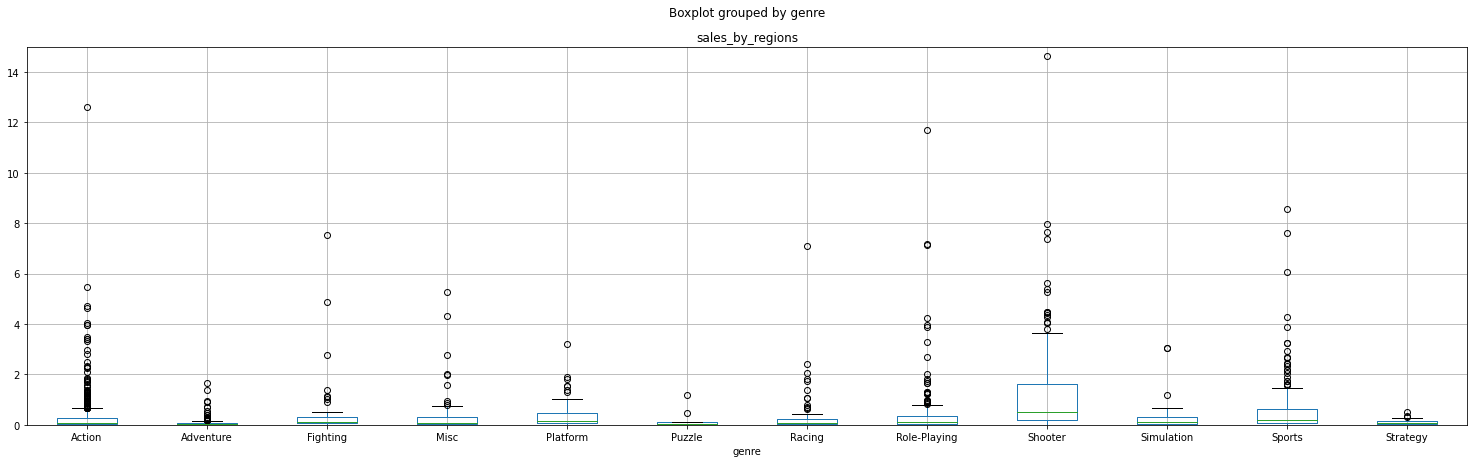

In [51]:
#ИСтроим разбивку продаж по платформам трижды, с разной степенью детализации
data_2014_2016.boxplot(column='sales_by_regions', by='genre', grid=True, figsize=(25,7))
plt.ylim(0, 15)
plt.show()

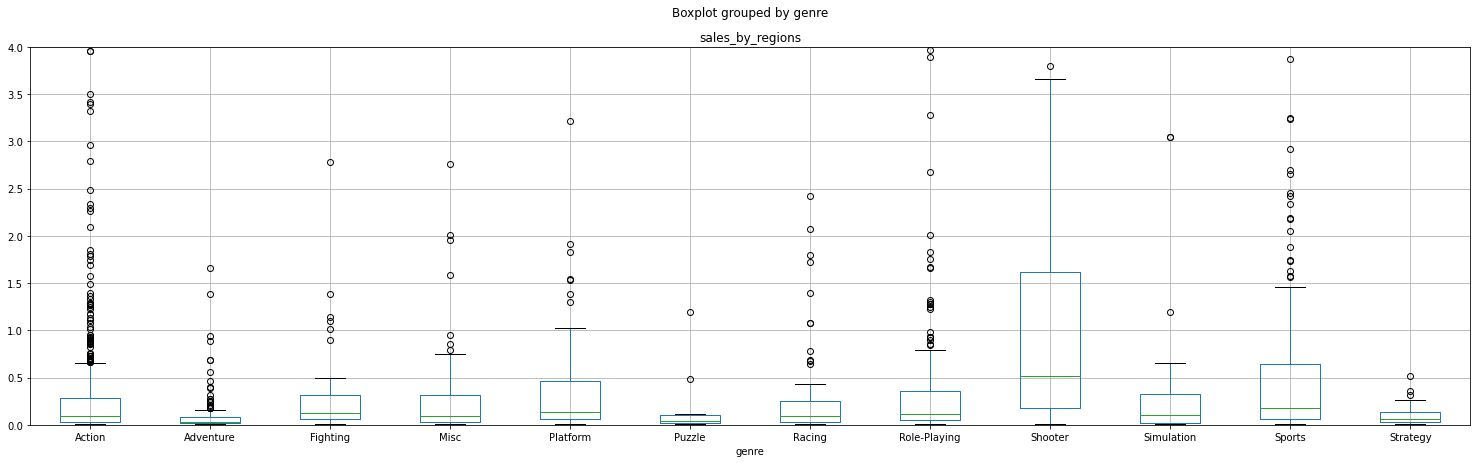

In [52]:
data_2014_2016.boxplot(column='sales_by_regions', by='genre', grid=True, figsize=(25,7))
plt.ylim(0, 4)
plt.show()

Самые популярные жанры, без учёта выброса, -  Shooter, Sports, Role-Playing, Simulation и Platform. Самые низкие продажи у жанров Adventure, Strategy и Puzzle.

In [53]:
# считаем количество проданных игр в каждом жанре
games = data_2014_2016.groupby('genre')['name'].count().reset_index()
games.rename(columns = {'name': 'number_of_games'}, inplace = True)
display(games)

,genre,number_of_games
0,Action,619
1,Adventure,185
2,Fighting,60
3,Misc,113
4,Platform,38
5,Puzzle,14
6,Racing,69
7,Role-Playing,221
8,Shooter,128
9,Simulation,44


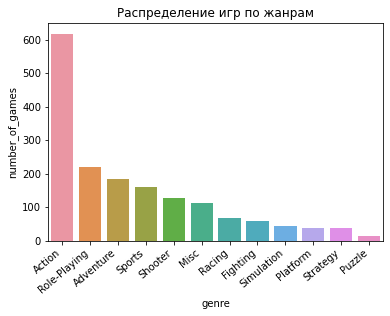

In [54]:
#Строим график распределения игр по жанрам
games_sort = games.sort_values(by = 'number_of_games', ascending = False)
ax = sns.barplot(x='genre', y='number_of_games', data = games_sort) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Распределение игр по жанрам')

plt.show()

Самое большое количество игр создано в жанрах Action,  Role-Playing, Adventure, Sports, Shooter. Самой маленькое количество игр - в жанрах Strategy, Platform и Puzzle.
Очевидно, что нет никакой связи между количеством игр в том или ином жанре и объёмом продаж в этом жанре. Например, игры жанра Action самые многочисленные, причём, с большим отрывом по этому показателю от жанра, занимающего второе место (Role-Playing), но этот жанр не входит в число лидеров продаж. В то же время, например, Жанр Platform находится на 8-м месте по числу игр и на 5-м - по объёму продаж; жанр Shooter стоит на 5-м месте по количеству игр и на 1-м - по объёму продаж.

## Составление портрета пользователя каждого региона.
<a id="user_profile"></a>

### Топ-5 продаж игровых платформ для Северной Америки

In [55]:
#Составляем Топ-5 продаж игровых платформ для Северной Америки за 2014-2016 гг.
#data_2015 = data.query('year_of_release >= 2015')
#display(data_2015)

#Строим таблицу для столбчатой диаграммы
popular_platform_2014_2016_na = data_2014_2016.groupby('platform')['na_sales'].sum().reset_index()
popular_platform_2014_2016_na = popular_platform_2014_2016_na.sort_values(by = 'na_sales', ascending = False).head()
display(popular_platform_2014_2016_na)
#Строим таблицу для круговой диаграммы
platform_2014_2016_na = data_2014_2016.groupby('platform')['na_sales'].sum()
platform_2014_2016_na = platform_2014_2016_na.sort_values(ascending = False)

#Создаём категорию others для круговой диаграммы
test = {'others': 0}

for i in range(len(platform_2014_2016_na)):
    
    if (platform_2014_2016_na[i] < 22): # проверяем значение на соответствие условию
        #display(platform_2014_2016_na[i])
        test['others'] += platform_2014_2016_na[i]
    else:
        name =  str(platform_2014_2016_na.index[i])
        test[name] = platform_2014_2016_na[i]
        
        
top_platform_2014_2016_na = pd.DataFrame.from_dict(test, orient='index', columns = [['platform'], ['na_sales']])

    

display(top_platform_2014_2016_na)

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


,platform
,na_sales
others,31.19
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


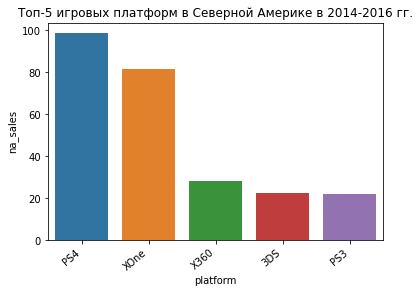

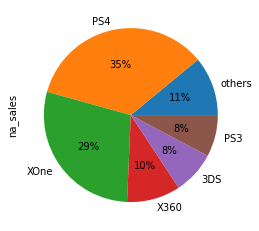

In [56]:
#Строим график Топ-5 продаж игровых платформ для Северной Америки за 2014-2016 гг.
ax = sns.barplot(x='platform', y='na_sales', data = popular_platform_2014_2016_na) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Топ-5 игровых платформ в Северной Америке в 2014-2016 гг.')

plt.show()
top_platform_2014_2016_na.plot(kind='pie', y='platform', autopct='%1.0f%%', legend = False)
plt.show()

В Топ-5 платформ для Северной Америки за 2014-2016 гг. попадают платформы: PlayStation4, XBox-One, с большим отставанием - Nintendo-3DS, Nintendo WiiU, XBox-360.

### Топ-5 продаж игровых платформ для Европы

In [57]:
#Составляем Топ-5 продаж игровых платформ для Европы за 2014-2016 гг.
popular_platform_2014_2016_eu = data_2014_2016.groupby('platform')['eu_sales'].sum().reset_index()
popular_platform_2014_2016_eu = popular_platform_2014_2016_eu.sort_values(by = 'eu_sales', ascending = False).head()
display(popular_platform_2014_2016_eu)


#Строим таблицу для круговой диаграммы
platform_2014_2016_eu = data_2014_2016.groupby('platform')['eu_sales'].sum()
platform_2014_2016_eu = platform_2014_2016_eu.sort_values(ascending = False)

#Создаём категорию others для круговой диаграммы
test = {'others': 0}

for i in range(len(platform_2014_2016_eu)):
    
    if (platform_2014_2016_eu[i] < 16): # проверяем значение на соответствие условию
        #display(platform_2014_2016_na[i])
        test['others'] += platform_2014_2016_eu[i]
    else:
        name =  str(platform_2014_2016_eu.index[i])
        test[name] = platform_2014_2016_eu[i]
        
        
top_platform_2014_2016_eu = pd.DataFrame.from_dict(test, orient='index', columns = [['platform'], ['eu_sales']])

    

display(top_platform_2014_2016_eu)

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


,platform
,eu_sales
others,34.76
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


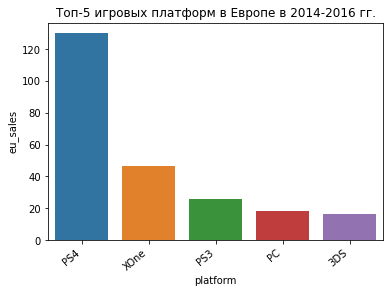

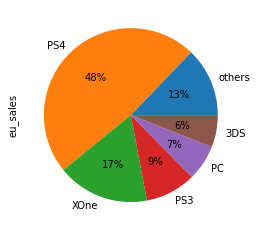

In [58]:
#Строим график Топ-5 продаж игровых платформ для Европы за 2014-2016 гг.
ax = sns.barplot(x='platform', y='eu_sales', data = popular_platform_2014_2016_eu) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Топ-5 игровых платформ в Европе в 2014-2016 гг.')

plt.show()

top_platform_2014_2016_eu.plot(kind='pie', y='platform', autopct='%1.0f%%', legend = False)
plt.show()

Как и в Северной Америке, в Европе лидирует PlayStation4, занимающая почти половину рынка, за ним с довольно большим отставанием идёт XBox-One, затем - PlayStation3 и только на 4-м месте стоят персональные компьютеры (PC) и на нижней строчке - Nintendo-3DS.

### Топ-5 продаж игровых платформ для Японии

In [59]:
#Составляем Топ-5 продаж игровых платформ для Японии за 2014-2016 гг.
popular_platform_2014_2016_jp = data_2014_2016.groupby('platform')['jp_sales'].sum().reset_index()
popular_platform_2014_2016_jp = popular_platform_2014_2016_jp.sort_values(by = 'jp_sales', ascending = False).head()
display(popular_platform_2014_2016_jp)

#Строим таблицу для круговой диаграммы
platform_2014_2016_jp = data_2014_2016.groupby('platform')['jp_sales'].sum()
platform_2014_2016_jp = platform_2014_2016_jp.sort_values(ascending = False)

#Создаём категорию others для круговой диаграммы
test = {'others': 0}

for i in range(len(platform_2014_2016_jp)):
    
    if (platform_2014_2016_jp[i] < 7): # проверяем значение на соответствие условию
        #display(platform_2014_2016_na[i])
        test['others'] += platform_2014_2016_jp[i]
    else:
        name =  str(platform_2014_2016_jp.index[i])
        test[name] = platform_2014_2016_jp[i]
        
        
top_platform_2014_2016_jp = pd.DataFrame.from_dict(test, orient='index', columns = [['platform'], ['jp_sales']])

    

display(top_platform_2014_2016_jp)

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


,platform
,jp_sales
others,0.76
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


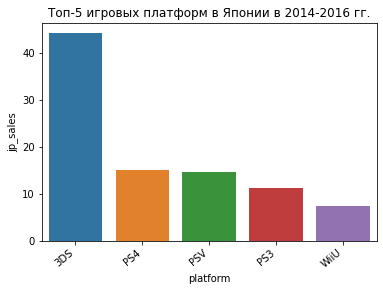

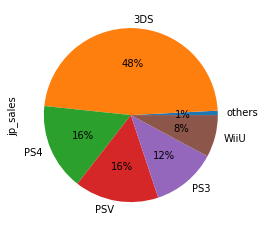

In [60]:
#Строим график Топ-5 продаж игровых платформ для Японии за 2014-2016 гг.
ax = sns.barplot(x='platform', y='jp_sales', data = popular_platform_2014_2016_jp) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Топ-5 игровых платформ в Японии в 2014-2016 гг.')

plt.show()

top_platform_2014_2016_jp.plot(kind='pie', y='platform', autopct='%1.0f%%', legend = False)
plt.show()

Топ-5 игровых платформ в 2015-2016 гг. в Японии отличается от результатов в Европе и Северной Америке. Первое место с большим отрывом занимает Nintendo 3DS (занимает почти половину рынка). PlayStation4 оказывается только на втором месте , уступая по объёму продаж в три раза. На втором месте с теми же 16% в Японии стоит PlayStation Vita, отсутствующая в Топ-5 других регионов; далее - PlayStation3, занимающая 5-е место в европейском рейтинге за 2015-2016 гг., и, наконец, NintendoWiiU.
Таким образом, картина в Японии сильно отличается. Именно благодаря японским пользователям Nintendo 3DS вошла в число трёх лидеров по продажам за 2015-2016 гг.
Интересно, что в Топ-5 не попал всего 1% платформ.

### Самые популярные жанры в Северной Америке

In [61]:
#определяем самые популярные жанры в Северной Америке за 2014-2016 гг.
popular_genre_2014_2016_na = data_2014_2016.groupby('genre')['na_sales'].sum().reset_index()
popular_genre_2014_2016_na = popular_genre_2014_2016_na.sort_values(by = 'na_sales', ascending = False).head()
display(popular_genre_2014_2016_na)

#Строим таблицу для круговой диаграммы
#Строим таблицу для круговой диаграммы
genre_2014_2016_na = data_2014_2016.groupby('genre')['na_sales'].sum()

genre_2014_2016_na = genre_2014_2016_na.sort_values(ascending = False)

#Создаём категорию others для круговой диаграммы
test = {'others': 0}

for i in range(len(genre_2014_2016_na)):
    
    if (genre_2014_2016_na[i] < 15): # проверяем значение на соответствие условию
        #display(platform_2014_2016_na[i])
        test['others'] += genre_2014_2016_na[i]
    else:
        name =  str(genre_2014_2016_na.index[i])
        test[name] = genre_2014_2016_na[i]
        
        
top_genre_2014_2016_na = pd.DataFrame.from_dict(test, orient='index', columns = [['genre'], ['na_sales']])

    

display(top_genre_2014_2016_na)

,genre,na_sales
8,Shooter,79.02
0,Action,72.53
10,Sports,46.13
7,Role-Playing,33.47
3,Misc,15.05


,genre
,na_sales
others,37.86
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


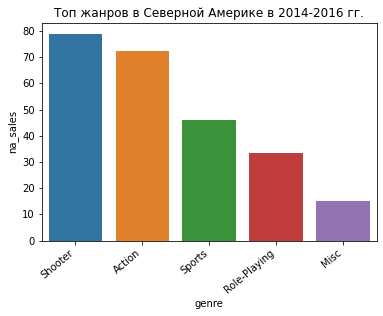

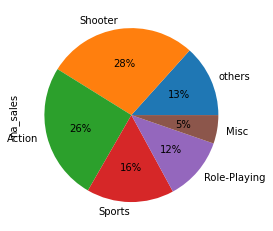

In [62]:
#Строим график самых популярных жанров в Северной Америке за 2014-2016 гг.
ax = sns.barplot(x='genre', y='na_sales', data = popular_genre_2014_2016_na) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Топ жанров в Северной Америке в 2014-2016 гг.')

plt.show()

top_genre_2014_2016_na.plot(kind='pie', y='genre', autopct='%1.0f%%', legend = False)
plt.show()

В Топ-5 жанров вошли Shooter, Action, Sports, Role-Playing и Misc.

### Самые популярные жанры в Европе

In [63]:
#определяем самые популярные жанры в Европе за 2014-2016 гг.
popular_genre_2014_2016_eu = data_2014_2016.groupby('genre')['eu_sales'].sum().reset_index()
popular_genre_2014_2016_eu = popular_genre_2014_2016_eu.sort_values(by = 'eu_sales', ascending = False).head()
display(popular_genre_2014_2016_eu)

#Строим таблицу для круговой диаграммы
genre_2014_2016_eu = data_2014_2016.groupby('genre')['eu_sales'].sum()
genre_2014_2016_eu = genre_2014_2016_eu.sort_values(ascending = False)

#Создаём категорию others для круговой диаграммы
test = {'others': 0}

for i in range(len(genre_2014_2016_eu)):
    
    if (genre_2014_2016_eu[i] < 14): # проверяем значение на соответствие условию
        #display(platform_2014_2016_na[i])
        test['others'] += genre_2014_2016_eu[i]
    else:
        name =  str(genre_2014_2016_eu.index[i])
        test[name] = genre_2014_2016_eu[i]
        
        
top_genre_2014_2016_eu = pd.DataFrame.from_dict(test, orient='index', columns = [['genre'], ['eu_sales']])

    

display(top_genre_2014_2016_eu)

,genre,eu_sales
0,Action,74.68
8,Shooter,65.52
10,Sports,45.73
7,Role-Playing,28.17
6,Racing,14.13


,genre
,eu_sales
others,42.45
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


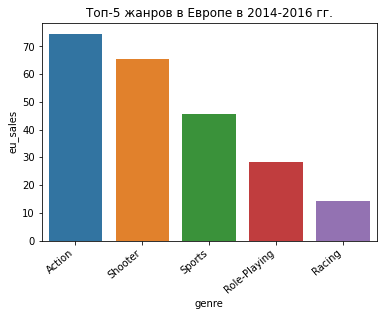

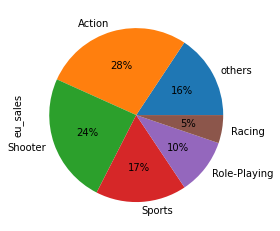

In [64]:
#Строим график самых популярных жанров в Европе за 2014-2016 гг.
ax = sns.barplot(x='genre', y='eu_sales', data = popular_genre_2014_2016_eu) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Топ-5 жанров в Европе в 2014-2016 гг.')

plt.show()

top_genre_2014_2016_eu.plot(kind='pie', y='genre', autopct='%1.0f%%', legend = False)
plt.show()

Топ для 2015-2016 гг. совпадает почти полностью с северо-американским: Action, Shooter, Sports, Role-Playing. Первые две категории, в сравнении с Северной Америкой, поменялись местами. Но в обоих случаях разница в популярности жанров небольшая. Отличия ест и в последней ступеньке - в Европе это - Racing, в Северной Америке - категория Misc.

### Самые популярные жанры в Японии

In [65]:
#определяем самые популярные жанры в Японии за 2014-2016 гг.
popular_genre_2014_2016_jp = data_2014_2016.groupby('genre')['jp_sales'].sum().reset_index()
popular_genre_2014_2016_jp = popular_genre_2014_2016_jp.sort_values(by = 'jp_sales', ascending = False).head()
display(popular_genre_2014_2016_jp)

#Строим таблицу для круговой диаграммы
genre_2014_2016_jp = data_2014_2016.groupby('genre')['jp_sales'].sum()
genre_2014_2016_jp = genre_2014_2016_jp.sort_values(ascending = False)
#Создаём категорию others для круговой диаграммы
test = {'others': 0}

for i in range(len(genre_2014_2016_jp)):
    
    if (genre_2014_2016_jp[i] < 4): # проверяем значение на соответствие условию
        #display(platform_2014_2016_na[i])
        test['others'] += genre_2014_2016_jp[i]
    else:
        name =  str(genre_2014_2016_jp.index[i])
        test[name] = genre_2014_2016_jp[i]
        
        
top_genre_2014_2016_jp = pd.DataFrame.from_dict(test, orient='index', columns = [['genre'], ['jp_sales']])

    

display(top_genre_2014_2016_jp)

,genre,jp_sales
7,Role-Playing,31.16
0,Action,29.58
2,Fighting,6.37
3,Misc,5.61
8,Shooter,4.87


,genre
,jp_sales
others,15.50
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


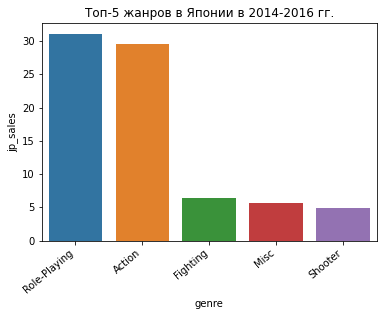

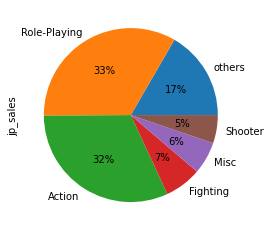

In [66]:
#Строим график самых популярных жанров в Японии за 2014-2016 гг.
ax = sns.barplot(x='genre', y='jp_sales', data = popular_genre_2014_2016_jp) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Топ-5 жанров в Японии в 2014-2016 гг.')

plt.show()

top_genre_2014_2016_jp.plot(kind='pie', y='genre', autopct='%1.0f%%', legend = False)
plt.show()

Рейтинг жанров для Японии отличается от аналогичных ему рейтингов в Северной Америке и Европе по составу.
1-е место - Role-Playing. 2-е место - Action (с отставанием в 1 п.п.). 3-е место ( с отставанием более чем в четыре с половиной раза от Action) - Fighting. Затем - категория Misc. Завершает Топ-5 жанров для Японии - Shooter.

Отдельно стоит обратить внимание на то, что предпочтения по жанрам в Северной Америке и Европе почти идентичны. В основном им свойственны непринципиальные различия в долях на рынке. А вот в Японии мы видим отличия по жанрам. Здесь нет Sports, зато появляется Fighting. В разы меньшую, чем в Северной Америке и в Европе,  популярность имеет Shooter. При этом очень популярен (для 2014-2016 гг. - на 1-м месте) Role-Playing. Это может говорить о культурных отличиях региона, на которые стоит обратить внимание.

### Влияние возрастного рейтинга игры на продажи в Северной Америке

In [67]:
#определяем влияние возрастного рейтинга игры на продажи в Северной Америке за 2014-2016 гг.
rating_2014_2016_na = data_2014_2016.groupby('rating')['na_sales'].sum().reset_index()
rating_2014_2016_na = rating_2014_2016_na.sort_values(by = 'na_sales', ascending = False).head(6)
display(rating_2014_2016_na)

,rating,na_sales
2,M,96.42
4,неизвестно,64.72
0,E,50.74
3,T,38.95
1,E10+,33.23


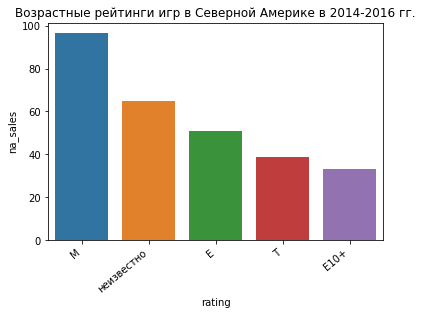

In [68]:
#Строим график влияния возрастного рейтинга игры на продажи в Северной Америке за 2014-2016 гг.
ax = sns.barplot(x='rating', y='na_sales', data = rating_2014_2016_na) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Возрастные рейтинги игр в Северной Америке в 2014-2016 гг.')

plt.show()

В Северной Америке за 2014-2016 гг. самое большое количество купленных игр относится категории M, подходящей для лиц старше 17 лет. "Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков."
Далее идут игры с неопределённым рейтингом. На 3-месте игры с ретингом E, подходящим для всех возрастов (в данных за весь период по региону лидировал именно он). На 4- месте - игры с рейтингом T, для людей от 13 лет. И на последнем месте - с рейтингом E10+ - для лиц старше 10 лет.

### Влияние возрастного рейтинга игры на продажи в Европе

In [69]:
#определяем влияние возрастного рейтинга игры на продажи в Европе за 2014-2016 гг.
rating_2014_2016_eu = data_2014_2016.groupby('rating')['eu_sales'].sum().reset_index()
rating_2014_2016_eu = rating_2014_2016_eu.sort_values(by = 'eu_sales', ascending = False)
display(rating_2014_2016_eu)

,rating,eu_sales
2,M,93.44
4,неизвестно,58.95
0,E,58.06
3,T,34.07
1,E10+,26.16


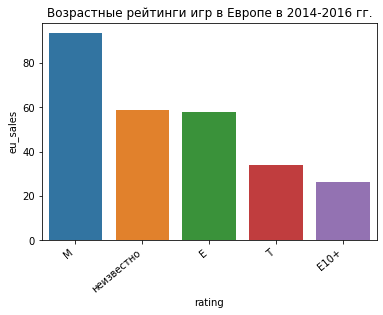

In [70]:
#Строим график влияния возрастного рейтинга игры на продажи в Европе за 2014-2016 гг.
ax = sns.barplot(x='rating', y='eu_sales', data = rating_2014_2016_eu) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Возрастные рейтинги игр в Европе в 2014-2016 гг.')

plt.show()

Самые большие продажи в Европе в 2014-2016 гг. у игр с рейтингом M, как и в Северной Америке. Здесь рейтинг за актуальный период так же, как и в слкчае с Северной Америкой, отличается от рейтинга за весь период. Здесь так же на втором месте стоит совокупность игр с неопределённым рейтингом. Так же, как и в предыдущем регионе присутствуют рейтинги E, T и E10+, который даёт наименьший показатель.

### Влияние возрастного рейтинга игры на продажи в Японии

In [71]:
#определяем влияние возрастного рейтинга игры на продажи в Японии за 2014-2016 гг.
rating_2014_2016_jp = data_2014_2016.groupby('rating')['jp_sales'].sum().reset_index()
rating_2014_2016_jp = rating_2014_2016_jp.sort_values(by = 'jp_sales', ascending = False)
display(rating_2014_2016_jp)

,rating,jp_sales
4,неизвестно,56.90
3,T,14.78
0,E,8.94
2,M,8.01
1,E10+,4.46


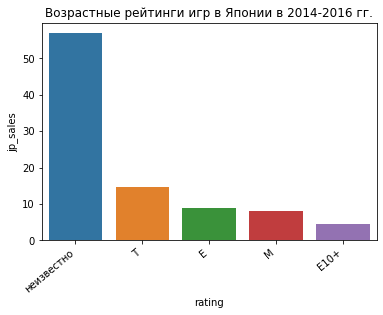

In [72]:
#Строим график влияния возрастного рейтинга игры на продажи в Японии за 2014-2016 гг.
ax = sns.barplot(x='rating', y='jp_sales', data = rating_2014_2016_jp) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Возрастные рейтинги игр в Японии в 2014-2016 гг.')

plt.show()

В Японии как за весь период, так и за актуальный на первом месте находится совокупность игр с неопределённым рейтингом. На втором месте (на первом - среди известных рейтингов) стоят игры с рейтингом T (игры для людей в возрасте от 13 лет). На втором - игры для всех возрастов. Только после этого идут игры для возрастной категории 17+. И наконец, (как и в двух других регионах) - игры с ретингом E10+.

Подводя итог по вопросу о рейтингах, нужно сразу оговориться о том, что картина здесь очень приблизительная из-за большой доли неопределённых значений. Для Японии они оба раза оказываются на первом месте по количеству. Порядок рейтингов по популярности игр в Северной Америке и в Европе - одинаковый. В Японии достаточно серьёзно отличается (если быть более точным - может отличаться).
Для Японии необходимо выяснить местные рейтинги, и учесть их в дальнейшем.

Подводя итоги по четвёртому шагу проекта можно сказать следующее:
1. В 2014-2016 гг. североамериканские пользователи предпочитали приобретать игры на платформах PlayStation4, XBox-One, с большим отставанием - Nintendo-3DS, Nintendo WiiU, XBox-360.
Три последние платформы по количеству продаж очень сильно отстают от первых двух. Среди названных жанров наиболее популярными являются: Shooter, Action, Sports, Role-Playing, Misc.
Основные возрастные рейтинги игр для пользователей этого региона: M, E, T E10+. Эта часть портрета пользователя не полна, поскольку весьма велико количество игр, рейтинги которых неизвестны.

2. Европейские пользователи в 2014-2016 гг. предпочитали игровые платформы PlayStation4, XBox-One, затем - персональные PlayStaytion3, компьютеры(PC), Nintendo-3DS, . Три последние платформы по количеству продаж очень сильно отстают от первых двух.
В числе популярных жанров оказались: Action, Shooter, Sports, Role-Playing, Racing.
Основные возрастные рейтинги игр для пользователей этого региона: M, E, T E10+. Эта часть портрета пользователя не полна, поскольку весьма велико количество игр, рейтинги которыз неизвестны. В этом пункте нет отличий от Северной Америки.

3. Пользователи в Япронии в 2014-2016 гг. предпочитали использовать игровые платформы Nintendo 3DS, PlayStation4, PlayStation Vita, PlayStation3, NintendoWiiU.
Популярными жанрами игр в этой стране стали: Role-Playing, Action, Fighting, Misc, Shooter. Категория  в случае рассмотрения её как жанра заняла бы четвёртую позицию.
Ситуация с игровыми рейтингами выглядит следующим образом: на первом месте оказались игры с неизвестным рейтингом. Их больше, чем игр с известными рейтингами вместе взятых. Затем идут рейтинги T, E, M, E10+.

Таким образом портреты европейского и северо-американского пользователей не почти не имеют различий. На портрет потребителя из Японии стоит обратить внимание. Здесь отличаются все три параметра, но особенно - жанры и рейтинги игр.
Для Японии необходимо выяснить местные рейтинги, и учесть их в дальнейшем.

## Проверка гипотез.
<a id="user_profile"></a>

### Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Формулируем нулевую и альтернативную гипотезы:
H0: Средние рейтинги платформ Xbox One и PC одинаковые.
H1: Средние рейтинги платформ Xbox One и PC разные.
Исходим из того, что уровень статистической значимости равен 1%, чтобы не отвергнуть каждую двадцатую гипотезу в результате ошибки.

In [73]:
#Фильтруем пропуски в отзывах пользователей.
data_2014_2016_filter = data_2014_2016[data_2014_2016['user_score'] != -1]
#Создаём переменные с данными по нужным платформам.
x_one = data_2014_2016_filter[data_2014_2016_filter['platform'] == 'XOne']
pc = data_2014_2016_filter[data_2014_2016_filter['platform'] == 'PC']
#Выбираем столбцы с рейтингами.
x_one_score = x_one['user_score']
pc_score = pc['user_score']
#Устанавливаем уровень статистической значимости.
alpha = .01

results = st.ttest_ind(x_one_score, pc_score)

display('Средний пользовательский рейтинг платформы Xbox One:', x_one_score.mean())
display('Средний пользовательский рейтинг платформы PC:', pc_score.mean())

display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'Средний пользовательский рейтинг платформы Xbox One:'

6.594545454545453

'Средний пользовательский рейтинг платформы PC:'

6.298360655737703

'p-значение:'

0.10450507919348415

'Не получилось отвергнуть нулевую гипотезу'

Средние пользовательские рейтинги платформ Xbox One и PC очень близки. Не удалось отвергнуть нулевую гипотезу. В случае применения уровня статистической значимости, равного 0.5, результат не изменился бы.

### Гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.

Формулируем нулевую и альтернативную гипотезы:
H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые. (Нулевая гипотеза должна быть сформулирована так, чтобы содержала положительное утверждение.)
H1: Средние пользовательские рейтинги жанров Action и Sports разные.
Исходим из того, что уровень статистической значимости равен 1%, чтобы не отвергнуть каждую двадцатую гипотезу в результате ошибки.

In [74]:
#Фильтруем пропуски в отзывах пользователей.
data_2014_2016_filter = data_2014_2016[data_2014_2016['user_score'] != -1]
#Создаём переменные с данными по нужным жанрам.
action = data_2014_2016_filter[data_2014_2016_filter['genre'] == 'Action']
sports = data_2014_2016_filter[data_2014_2016_filter['genre'] == 'Sports']
#Выбираем столбцы с рейтингами.
action_score = action['user_score']
sports_score = sports['user_score']
#Устанавливаем уроыень статистической значимости.
alpha = .01

results = st.ttest_ind(action_score, sports_score)

display('Средний пользовательский рейтинг жанра Action:', action_score.mean())
display('Средний пользовательский рейтинг жанра Sports:', sports_score.mean())

display('p-значение:', results.pvalue)

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'Средний пользовательский рейтинг жанра Action:'

6.760606060606054

'Средний пользовательский рейтинг жанра Sports:'

5.225196850393697

'p-значение:'

2.8711147985105864e-19

'Отвергаем нулевую гипотезу'

Средние пользовательские рейтинги жанров Action и Sports серьёзно отличаются. На имеющихся данных, на уровне значимости 1% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.
В случае применения уровня статистической значимости, равного 5%, результат не изменился бы.

## Общий вывод.
<a id="outcome"></a>

#### 1. Интенсивный рост количества продаж компьютерных игр начинается с 1993-1994 гг., с изменением качества игр.
2. Новые игровый платформы появляются с интервалом около пяти лет. Медианная продолжительность "жизни" платформ составляет 7 лет.
3. Актуальный период для анализа в нашем случае - 2015-2016 гг., поскольку тенденции для всех платформ в этот период одинаковые и они не меняются за весь отрезок времени.
4. Объём продаж для всех платформ падает. При этом наиболее прибыльными остаются три платформы: PlayStation4, XBox-One, Nintendo 3DS.
5. Корреляция между отзывами пользователей и критиков, с одной стороны, и объёмами продаж - с другой, как правило - слабая положительная. В отдельных случаях корреляция между пользовательскими отзывами и продажами - слабая отрицательная. 
6. Наиболее прибыльными жанрами в целом стали Action, Shooter, Sports, Role-Playing.
7. Общий портрет пользователей всех трёх обозначенных регионов составить невозможно. Относительно общая картина прослеживается в Северной Америке и Европе. Ситуация в Японии ожидаемо (если мы заранее знаем о срецифичности культуры) отличается и это отличие нужно учитывать. Положение несколько усугубляет большаю доля неопределённых возрастных рейтингов игр.

Для рекламных кампаний в Европе и Северной Америке нужно сделать акцент на PlayStation4 и  XBox-One (в порядке убывания). В Европе основной акцент можно сделать на PlayStation4, поскольку эта платформа занимает 48% рынка в этом регионе. Основными жанрами для продвижения станут Shooter, Action, Sports, Role-Playing (помимо этого в Северной Америке могут быть относительно успешными продажи игр в жанре Fighting, а в Европе - Racing) с возрастными рейтингами M, E, T, E10+, в порядке убывания. То есть основными будут игры для людей 17 лет и старше.

Для рекламной кампании в Японии основными платформами будут Nintendo 3DS и PlayStation4 (в порядке убывания). Платформы, не вошедшие в Топ-5 в этом регионе, не имеют значения, так как вместе набирают 1% на рынке. Основными жанрами для продвижения станут Action, Role-Playing (с большим отставанием идёт Shooting и возможно в Японии стоит обратить внимание на жанр, не попавший в Топ-5 в других регионах - Adventure, а так же категория Misc, включающая в себя разные жанры). Ситуация с возрастными рейтингами здесь отличается. Во-первых доля неопределённого рейтинга здесь выше, чем доли известных рейтингов вместе взятых. Было бы полезно провести дополнительное исследование, чтобы понять насколько это меняет картину в целом. Во-вторых, возрастные рейтинги здесь идут в несколько ином порядке, чем в Европе и Северной Америке: T, E, M, E10+, в порядке убывания. То есть основными здесь будут игры для людей 13 лет и старше. Игры с рейтингом M (17+) оказываются только на третьем месте. Что, впрочем, не означает, что в Японии в компьютерные игры играет  только молодёжь или тинэйджеры.
Большое количество неопределённых возрастных рейтингов для Японии означает, необходимо выяснить местные аозрастные рейтинги игр, и учесть их в дальнейшем.